In [1]:
# Step 4 - Exploratory Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv(r"loans_clean.csv")
#Loading Cleaned Dataset to proceed with Exploratory Data Analysis




In [2]:
df.shape

(614, 13)

In [3]:
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,4617.111564,1621.245798,137.920195,342.410423,0.855049
std,2479.851729,2926.248369,57.040713,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,10171.250000,41667.000000,270.000000,480.000000,1.000000


In [6]:
missing = (df.isnull().sum()).sort_values(ascending=False)
missing_percent = (df.isnull().mean()*100).sort_values(ascending=False).round(2)
pd.concat([missing,missing_percent], axis=1,keys=['missing','%'])

,missing,%
Loan_ID,0,0.0
Gender,0,0.0
Married,0,0.0
Dependents,0,0.0
Education,0,0.0
Self_Employed,0,0.0
ApplicantIncome,0,0.0
CoapplicantIncome,0,0.0
LoanAmount,0,0.0
Loan_Amount_Term,0,0.0


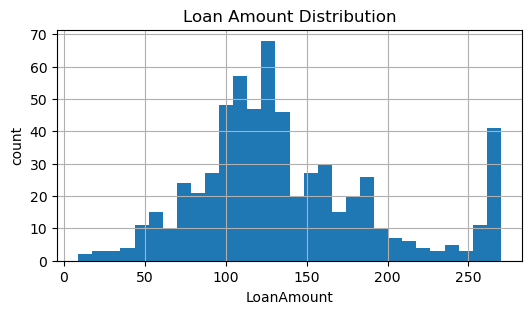

In [10]:
### Univariate Analysis - Loan Amount
plt.figure(figsize=(6,3))
df['LoanAmount'].dropna().hist(bins=30)
plt.title('Loan Amount Distribution')
plt.xlabel('LoanAmount')
plt.ylabel('count')
plt.savefig('hist1.png',bbox_inches='tight')
plt.show()


In [12]:
median_value=df['LoanAmount'].median()
print("median:",median_value)


median: 128.0


In [13]:
mode_value=df['LoanAmount'].mode()
print("mode:",mode_value)

mode: 0    270.0
Name: LoanAmount, dtype: float64


In [ ]:
### Loan Amount — Summary
- The distribution of loan amounts is **slightly right-skewed**, indicating that most applicants request smaller to mid-range loan amounts.  
- The peak frequency lies between ₹100K and ₹150K.  
- Very few applicants have high loan amounts near ₹250K, possibly due to capping of extreme values during outlier handling.  
- The majority of loans  are concentrated between ₹50K and ₹200K.  
- Overall, the distribution shows moderate variation, with a small presence of high-value loans.


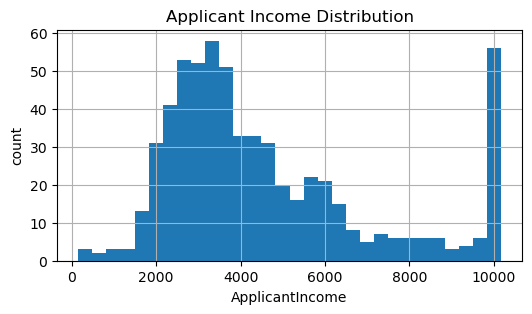

In [14]:
### Univariate Analysis - Applicant Income
plt.figure(figsize=(6,3))
df['ApplicantIncome'].dropna().hist(bins=30)
plt.title('Applicant Income Distribution')
plt.xlabel('ApplicantIncome')
plt.ylabel('count')
plt.savefig('hist2.png',bbox_inches='tight')
plt.show()

In [ ]:
###Applicant Income Distribution — Summary
-The histogram shows that most applicants earn between ₹2,000 and ₹4,000 per month.
-A smaller number of applicants have much higher incomes, with a few extreme values up to ₹10,000+.
-The distribution is slightly right-skewed, meaning there are a few high-income outliers pulling the tail toward the right.
-This is confirmed by the likely relation:
Mean > Median < Mode

<Figure size 600x300 with 0 Axes>

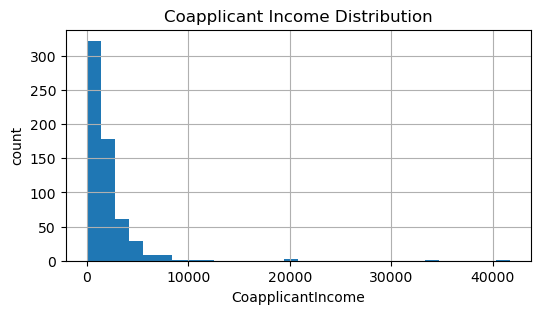

In [16]:
### Univariate Analysis - CoApplicant Income
plt.figure(figsize=(6,3))
df['CoapplicantIncome'].dropna().hist(bins=30)
plt.title('Coapplicant Income Distribution')
plt.xlabel('CoapplicantIncome')
plt.ylabel('count')
plt.savefig('hist3.png',bbox_inches='tight')
plt.show()

In [ ]:
### Coapplicant Income Distribution - Summary
-The distribution is slightly right-skewed.
-A small number of coapplicants earn significantly more than the majority.

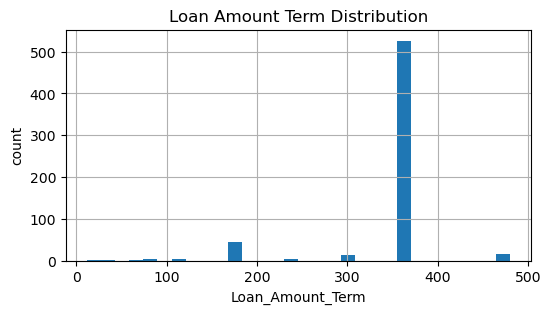

In [17]:
### Univariate Analysis - Loan Amount Term 
plt.figure(figsize=(6,3))
df['Loan_Amount_Term'].dropna().hist(bins=30)
plt.title('Loan Amount Term Distribution')
plt.xlabel('Loan_Amount_Term')
plt.ylabel('count')
plt.savefig('hist4.png',bbox_inches='tight')
plt.show()

In [ ]:
The histogram shows the distribution of loan terms.
- There is a major peak at 360 months, meaning most loans have a term of 30 years.
- There are a few scattered values on the lower end (e.g., 6, 12, 120, 180, etc.).
- A long tail exists on the left side.

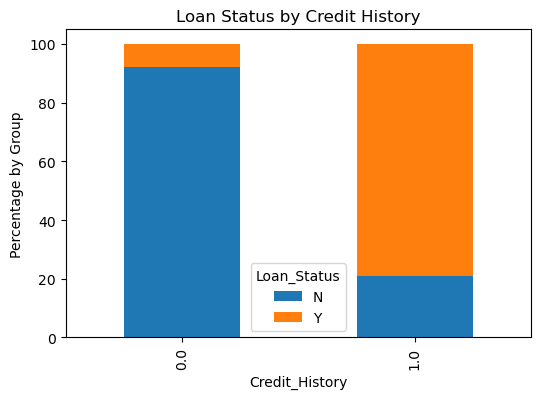

In [18]:
## Bivariate Analysis - It studies the relationship between two variables.
##Categorical Variable vs Target Variable
ct=pd.crosstab(df['Credit_History'],df['Loan_Status'],normalize='index')*100
ct.plot(kind='bar',stacked= True,figsize=(6,4))
plt.ylabel('Percentage by Group')
plt.title('Loan Status by Credit History')
plt.savefig('bivariate1.png',bbox_inches='tight')
plt.show()


In [ ]:
## Credit history vs Approval
- Example: Applicants with Credit_History=1 have 85% approval vs 30% when =0.
- Business meaning: Credit history strongly influences eligibility.


<Figure size 600x400 with 0 Axes>

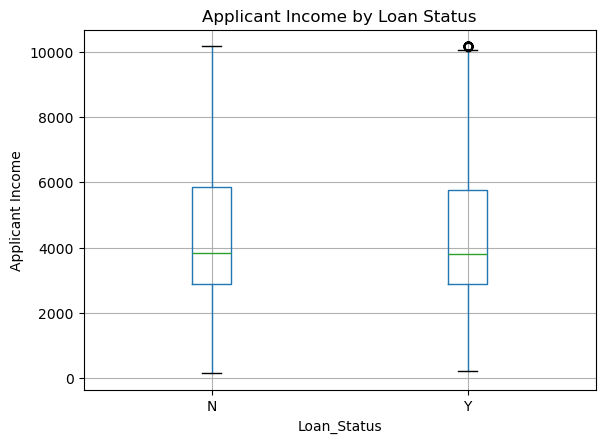

In [24]:
## Bivariate Analysis
## Numeric vs Target
plt.figure(figsize=(6,4))
df.boxplot(column='ApplicantIncome', by='Loan_Status')
plt.title('Applicant Income by Loan Status')
plt.ylabel('Applicant Income')
plt.suptitle('')
plt.savefig('Bivariate2.png',bbox_inches='tight')
plt.show()


In [ ]:
##Applicant Income vs Loan Status
-Median income is similar for both approved and not approved applicants.
-Approved applicants show less income variability.
-Outliers with very high income are present in the approved group.
-Income alone may not determine loan approval.

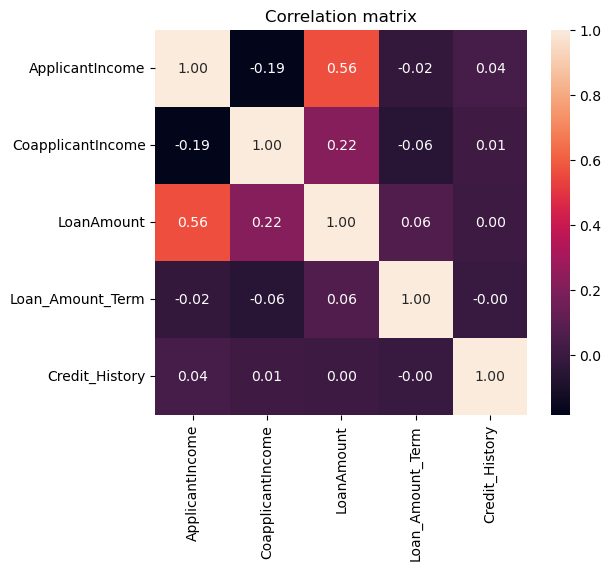

In [26]:
##Correlation
#It describes the strength of the direction of relationship between two numeric variables.
import numpy as np    
num = df.select_dtypes(include=[np.number])
corr=num.corr()
corr.round(2)

import seaborn as sns
plt.figure(figsize=(6,5))
sns.heatmap(corr,annot=True,fmt=".2f")
plt.title('Correlation matrix')
plt.savefig('Correlation.png',bbox_inches='tight')
plt.show()




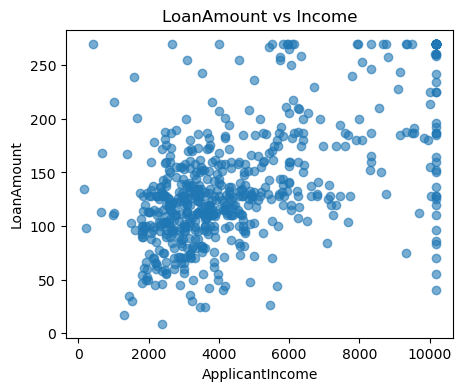

In [27]:
## Scatter Diagram
plt.figure(figsize=(5,4))
plt.scatter(df['ApplicantIncome'], df['LoanAmount'],alpha=0.6)
plt.xlabel('ApplicantIncome');plt.ylabel('LoanAmount')
plt.title('LoanAmount vs Income')
plt.savefig('Scatter.png',bbox_inches='tight')
plt.show()

In [ ]:
##Positive Correlation
-The plot reveals a positive correlation between the two variables. 
-As the applicant's income increases , the loan amount also tends to increase (moving along the y-axis). 
Data Distribution
-The majority of the data points are clustered in the lower-to-middle range of both income and loan amount.
Outliers
-There are some data points, or outliers, that show high loan amounts for relatively low incomes, and a significant number of data points with very high incomes (around 10,000) that have a wide range of loan amounts

In [30]:
 
pd.pivot_table(df, index='Credit_History', columns='Education', values='LoanAmount', aggfunc='median')

Education,Graduate,Not Graduate
Credit_History,,
0.0,128.0,124.0
1.0,130.0,117.5


In [31]:
pd.pivot_table(df,index='Loan_Status',values=['ApplicantIncome','LoanAmount'],aggfunc='median')

,ApplicantIncome,LoanAmount
Loan_Status,,
N,3833.5,128.0
Y,3812.5,128.0


In [35]:
pd.pivot_table(df,index='Property_Area',columns='Loan_Status',values='LoanAmount',aggfunc='median')

Loan_Status,N,Y
Property_Area,,
Rural,132.0,132.0
Semiurban,132.5,125.0
Urban,126.0,120.0


In [ ]:
#EDA Summary
-Applicants with Credit_History=1 have much higher approval rates.
-Higher ApplicantIncome correlates with higher approval median.
#Deliverables for Step 4 
- notebooks/03-EDA.ipynb with code cells + markdown notes after each output.
-outputs/figures/ containing saved charts (6–10 images).
-outputs/reports/eda_summary.md